In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import regularizers
from keras.regularizers import l2
from keras import backend as K
from keras.models import load_model
from keras.utils import to_categorical
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from numpy import dstack
from os import makedirs
import itertools
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [2]:
df=pd.read_csv('ildp2.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
avg=df['Albumin_and_Globulin_Ratio'].mean()
df=df.replace(to_replace = np.nan, value = avg)  

Number of patients diagnosed with liver disease (denoted by "1"):  416
Number of patients not diagnosed with liver disease (denoted by "2"):  167


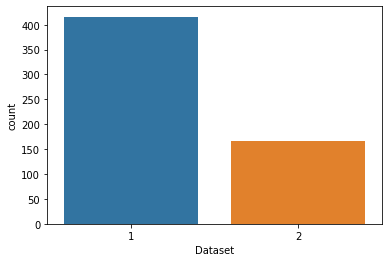

In [6]:
sns.countplot(data=df, x = 'Dataset', label='Count')

Yes,No = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease (denoted by "1"): ',Yes)
print('Number of patients not diagnosed with liver disease (denoted by "2"): ',No)

Number of patients that are male:  441
Number of patients that are female:  142


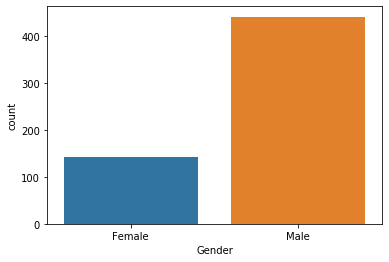

In [7]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

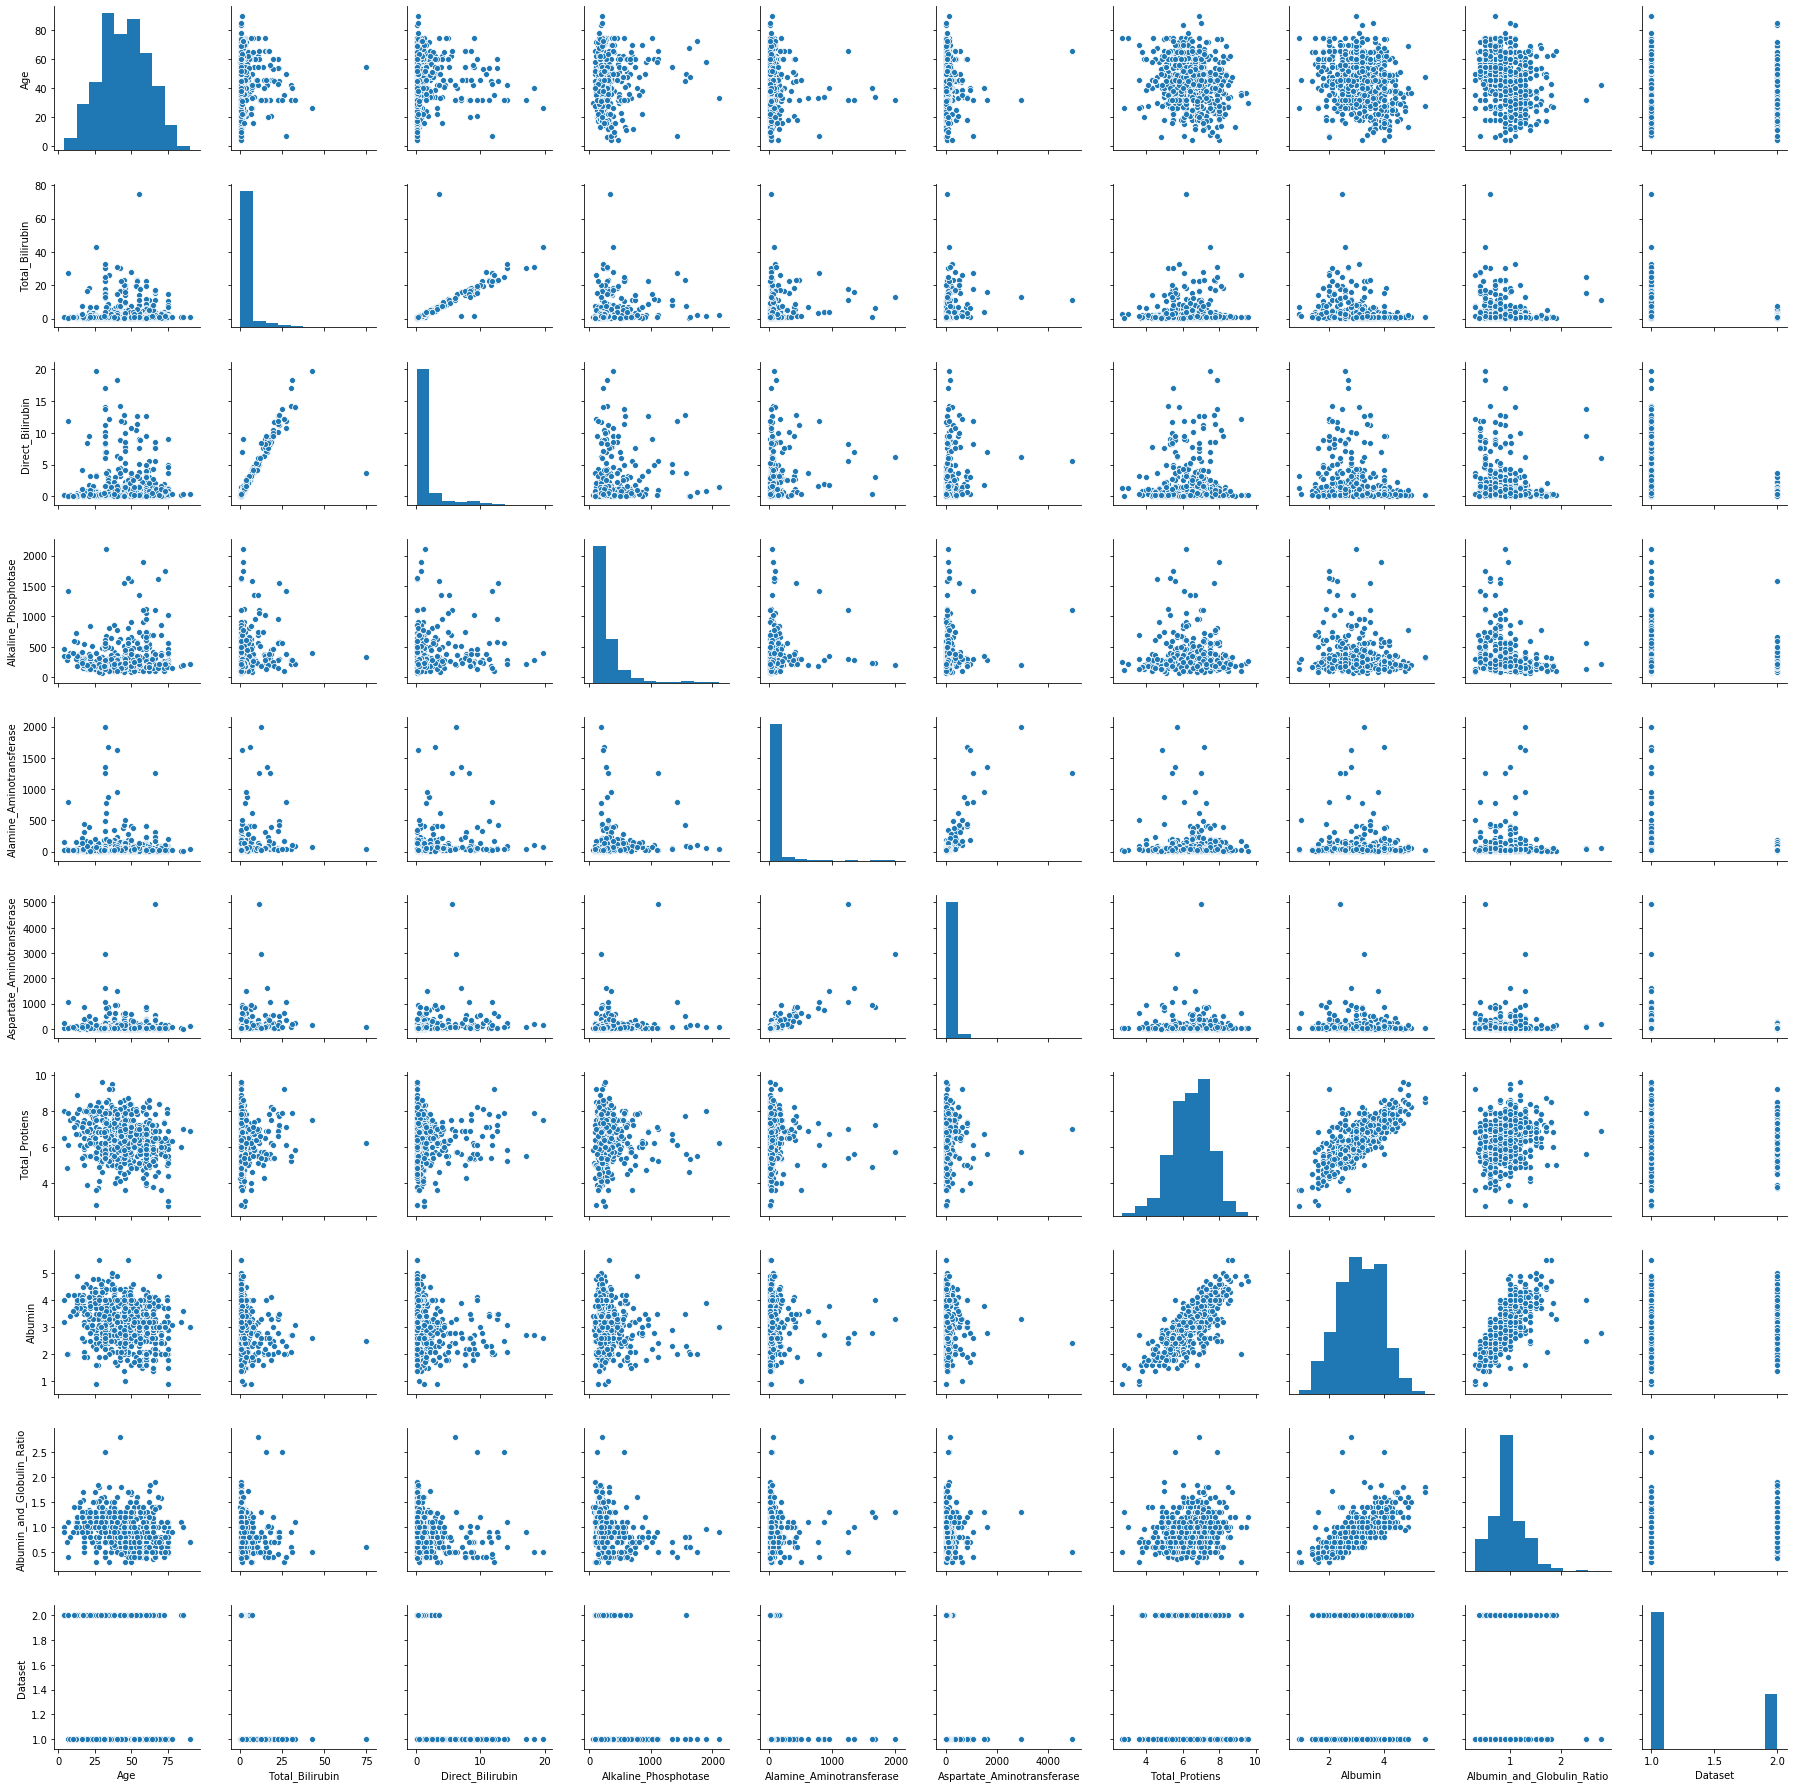

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
cleanup_nums = {"Gender":     {"Female": 0, "Male": 1}}
df.replace(cleanup_nums, inplace=True)

In [10]:
corr_matrix=df.corr()
corr_matrix['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.162319
Albumin                       0.161388
Total_Protiens                0.035008
Gender                       -0.082416
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64

In [11]:
df['Alamine_Aminotransferase'].value_counts()

25      25
20      23
22      18
18      17
28      17
        ..
71       1
75       1
76       1
78       1
2000     1
Name: Alamine_Aminotransferase, Length: 152, dtype: int64

In [12]:
%matplotlib inline 
#from pandas.plotting import scatter_matrix
#attributes=["Dataset","Albumin_and_Globulin_Ratio","Total_Protiens","Age","Aspartate_Aminotransferase","Alamine_Aminotransferase","Alkaline_Phosphotase","Total_Bilirubin","Direct_Bilirubin"]
#scatter_matrix( df[attributes],figsize=(25,25))

In [13]:
from sklearn.model_selection import train_test_split
x = df.loc[:,"Age":"Albumin_and_Globulin_Ratio"] 
y = df["Dataset"]
train_set, test_set, train_set_labels, test_set_labels = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [14]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:408
Rows in test set:175



In [15]:
from sklearn.preprocessing import StandardScaler
x = train_set.values #returns a numpy array
x_scaled = StandardScaler().fit_transform(x)
train_set = pd.DataFrame(x_scaled)

y = test_set.values #returns a numpy array
y_scaled = StandardScaler().fit_transform(y)
test_set = pd.DataFrame(y_scaled)

In [16]:
X_train = train_set.astype('float32')
X_test = test_set.astype('float32')
print("Input data shape",train_set.shape)

Input data shape (408, 10)


In [17]:
train_set_labels

272    1
395    2
204    2
208    1
179    1
      ..
70     1
132    2
289    1
109    2
480    2
Name: Dataset, Length: 408, dtype: int64

# MLP CLASSIFIER

MLP classifier Score: 
 100.0
MLP classifier Test Score: 
 72.0
Accuracy: 
 0.72
[[94 29]
 [20 32]]
              precision    recall  f1-score   support

           1       0.82      0.76      0.79       123
           2       0.52      0.62      0.57        52

    accuracy                           0.72       175
   macro avg       0.67      0.69      0.68       175
weighted avg       0.74      0.72      0.73       175



/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


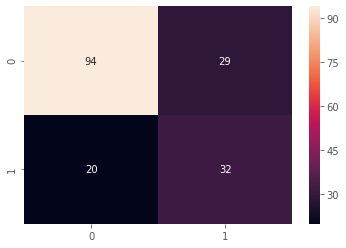

In [34]:
#MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='tanh', max_iter=500, alpha=1e-4,
                     solver='lbfgs', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(train_set,train_set_labels)
#Predict Output 
y_pred = clf.predict(test_set)
mlp_score = round(clf.score(train_set, train_set_labels) * 100, 2)
mlp_score_test = round(clf.score(test_set, test_set_labels) * 100, 2)
print('MLP classifier Score: \n', mlp_score)
print('MLP classifier Test Score: \n', mlp_score_test)
print('Accuracy: \n', accuracy_score(test_set_labels,y_pred))
print(confusion_matrix(test_set_labels,y_pred))
print(classification_report(test_set_labels,y_pred))
sns.heatmap(confusion_matrix(test_set_labels,y_pred),annot=True,fmt="d")

# LOGISTIC REGRESSION

Logistic Regression Training Score: 
 71.57
Logistic Regression Test Score: 
 73.14
Coefficient: 
 [[-0.30190017 -0.00967879 -0.4744426  -0.86822842 -0.59609727 -1.54557826
  -0.74329607 -0.58204275  0.72425858 -0.24684877]]
Intercept: 
 [-1.80787507]
Accuracy: 
 0.7314285714285714
Confusion Matrix: 
 [[96 27]
 [20 32]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.83      0.78      0.80       123
           2       0.54      0.62      0.58        52

    accuracy                           0.73       175
   macro avg       0.68      0.70      0.69       175
weighted avg       0.74      0.73      0.74       175



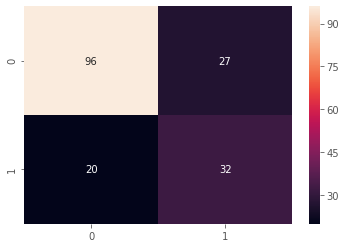

In [32]:
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(train_set, train_set_labels)
#Predict Output
log_predicted= logreg.predict(test_set)
logreg_score = round(logreg.score(train_set, train_set_labels) * 100, 2)
logreg_score_test = round(logreg.score(test_set, test_set_labels) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(test_set_labels,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(test_set_labels,log_predicted))
print('Classification Report: \n', classification_report(test_set_labels,log_predicted))

sns.heatmap(confusion_matrix(test_set_labels,log_predicted),annot=True,fmt="d")

# GUASSIAN NAIVE BAYES

Gaussian Score: 
 56.13
Gaussian Test Score: 
 61.71
Accuracy: 
 0.6171428571428571
[[62 61]
 [ 6 46]]
              precision    recall  f1-score   support

           1       0.91      0.50      0.65       123
           2       0.43      0.88      0.58        52

    accuracy                           0.62       175
   macro avg       0.67      0.69      0.61       175
weighted avg       0.77      0.62      0.63       175



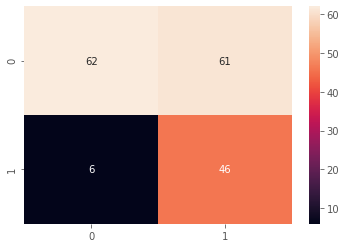

In [33]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(train_set,train_set_labels)
#Predict Output
gauss_predicted = gaussian.predict(test_set)
gauss_score = round(gaussian.score(train_set, train_set_labels) * 100, 2)
gauss_score_test = round(gaussian.score(test_set, test_set_labels) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(test_set_labels, gauss_predicted))
print(confusion_matrix(test_set_labels,gauss_predicted))
print(classification_report(test_set_labels,gauss_predicted))

sns.heatmap(confusion_matrix(test_set_labels,gauss_predicted),annot=True,fmt="d")

# RANDOM FOREST

Random Forest Score: 
 100.0
Random Forest Test Score: 
 69.71
Accuracy: 
 0.6971428571428572
[[91 32]
 [21 31]]
              precision    recall  f1-score   support

           1       0.81      0.74      0.77       123
           2       0.49      0.60      0.54        52

    accuracy                           0.70       175
   macro avg       0.65      0.67      0.66       175
weighted avg       0.72      0.70      0.70       175



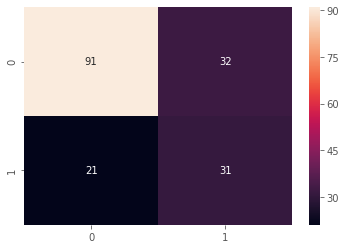

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_set, train_set_labels)
#Predict Output
rf_predicted = random_forest.predict(test_set)

random_forest_score = round(random_forest.score(train_set, train_set_labels) * 100, 2)
random_forest_score_test = round(random_forest.score(test_set, test_set_labels) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(test_set_labels,rf_predicted))
print(confusion_matrix(test_set_labels,rf_predicted))
print(classification_report(test_set_labels,rf_predicted))
sns.heatmap(confusion_matrix(test_set_labels,rf_predicted),annot=True,fmt="d")

# ANN HYPERPARAMETERS

In [18]:
epochs = 10
batch_size = 128
verbose = 0
classes = 3

optimizer = Adam()
hidden = 128
validation_split = 0.1
dropout = 0.1

In [19]:
Y_train = np_utils.to_categorical(train_set_labels, classes)
Y_test = np_utils.to_categorical(test_set_labels, classes)

# BUILDING OUR ANN

In [20]:
def fit_model(X_train,Y_train):
    def l1_reg(weight_matrix):
        return 0.2 * K.sum(K.abs(weight_matrix))

    model = Sequential()
    model.add(Dense(hidden, input_shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(hidden))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batch_size, verbose = verbose,epochs=epochs, validation_split=validation_split)
    return model, history

In [21]:
if not os.path.isdir("./models/"):
    makedirs('models')

In [22]:
n_members =10
for i in range(n_members):
    model,history = fit_model(X_train,Y_train)
    filename = 'models/model_' + str(i + 1) + '.h5'
    model.save(filename)
    print('Saved %s' % filename)
model.summary()

Saved models/model_1.h5
Saved models/model_2.h5
Saved models/model_3.h5
Saved models/model_4.h5
Saved models/model_5.h5
Saved models/model_6.h5
Saved models/model_7.h5
Saved models/model_8.h5
Saved models/model_9.h5
Saved models/model_10.h5
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
__________

# TRAINING

In [23]:
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        filename = 'models/model_' + str(i + 1) + '.h5'
        model = load_model(filename)
        all_models.append(model)
        print('loaded %s' % filename)
    return all_models

members = load_all_models(n_members)
print('Loaded %d models' % len(members))

for model in members:
    score = model.evaluate(X_test, Y_test, verbose = verbose)
    print('Testing Accuracy is {:.2f}%'.format((score[1])*100))

loaded models/model_1.h5
loaded models/model_2.h5
loaded models/model_3.h5
loaded models/model_4.h5
loaded models/model_5.h5
loaded models/model_6.h5
loaded models/model_7.h5
loaded models/model_8.h5
loaded models/model_9.h5
loaded models/model_10.h5
Loaded 10 models
Testing Accuracy is 70.86%
Testing Accuracy is 72.00%
Testing Accuracy is 72.57%
Testing Accuracy is 73.14%
Testing Accuracy is 74.86%
Testing Accuracy is 70.86%
Testing Accuracy is 68.57%
Testing Accuracy is 66.86%
Testing Accuracy is 72.00%
Testing Accuracy is 70.29%


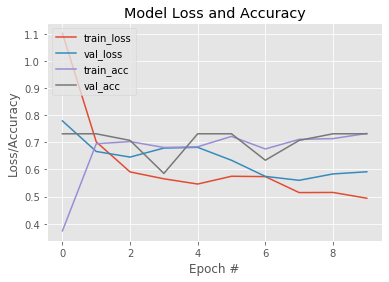

In [24]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Model Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='upper left')
plt.savefig("lossAndaccuracy.jpeg")
plt.show()


# OUR STACKED MODEL

In [26]:
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
        ystack = model.predict(inputX)
        # stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = ystack
        else:
            stackX = dstack((stackX, ystack))
    # flatten predictions to [rows, members x probabilities]
    nsamples, nx, ny = stackX.shape
    stackX = stackX.reshape((nsamples,nx*ny))
    return stackX

def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(stackedX, inputy)
    return model

def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    model = fit_stacked_model(members, X_test, Y_test)
    ystack = model.predict(stackedX)
    return ystack

# fit stacked model using the ensemble
model = fit_stacked_model(members, X_test, Y_test)

In [27]:
ystack = stacked_prediction(members, model, X_test)
acc = accuracy_score(Y_test, ystack)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [41]:
print(classification_report(Y_test[:,1:], ystack[:,1:],target_names=['1','2']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00        52

   micro avg       1.00      1.00      1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175
 samples avg       1.00      1.00      1.00       175



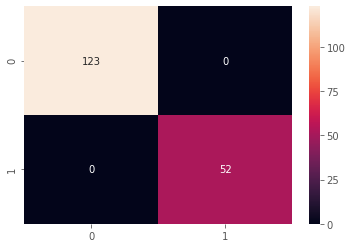

In [30]:
sns.heatmap(confusion_matrix(Y_test.argmax(axis=1), ystack.argmax(axis=1)),annot=True,fmt="d")

from sklearn.metrics import roc_curve,auc
plt.figure(figsize=(20,20))
no = 1
names = ["Logistic Regression","Random Forest Classifier"]
models = [logreg,random_forest]
for model,name in zip(models,names):   
    ax = plt.subplot(4, 2, no)
    fpr, tpr, _ = roc_curve(test_set_labels, model.predict(test_set))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([1, 2], [1, 2], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic %s'%name)
    plt.legend(loc="lower right")
    no += 1
plt.tight_layout()